Imports

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import helpers.evaluate
from helpers.model_list import model_map
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
from sklearn.exceptions import FitFailedWarning

#Import models
models = {name: model_class() for name, model_class in model_map.items()}

Load in Data

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


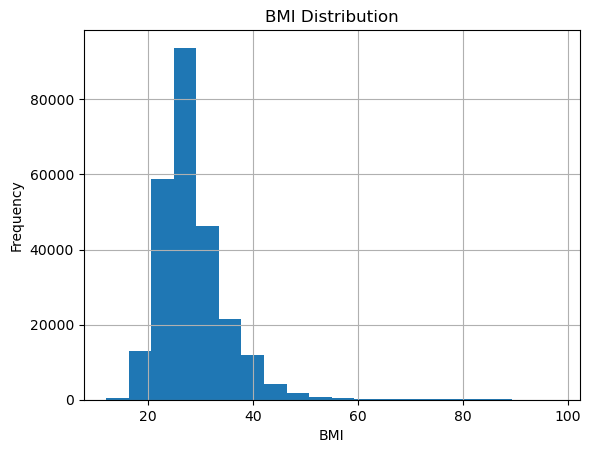

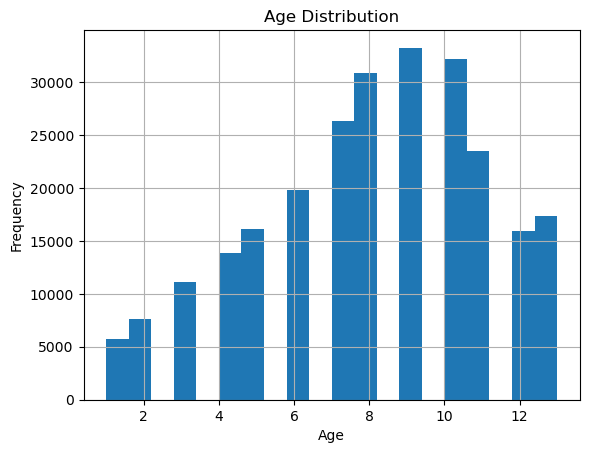

In [3]:
# Univariate Analysis
plt.figure()
df['BMI'].hist(bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older
plt.figure()
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


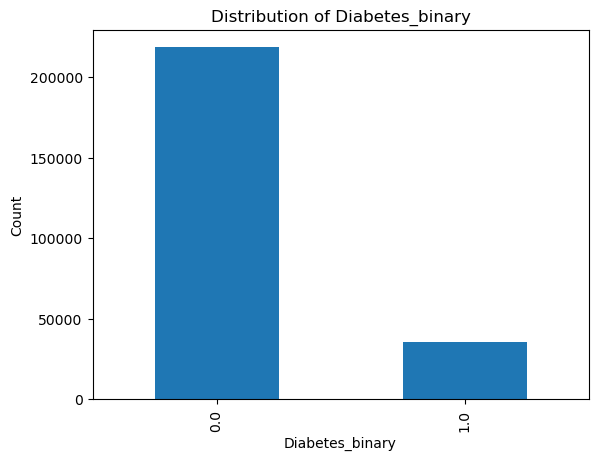

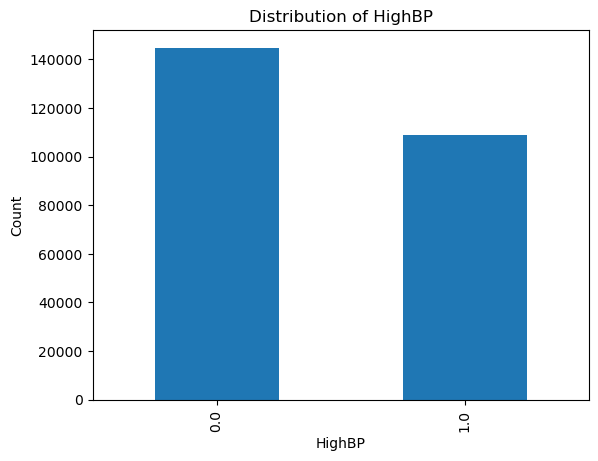

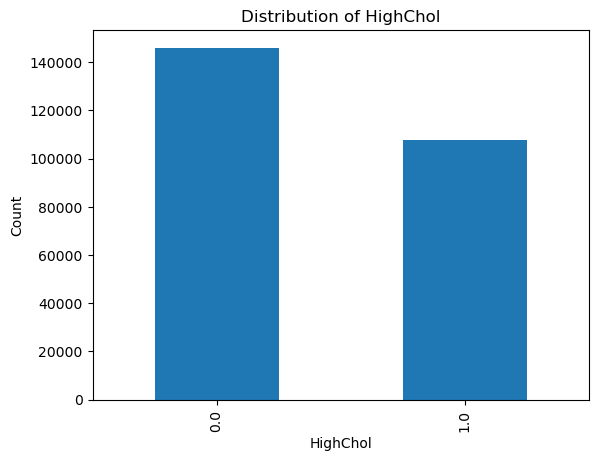

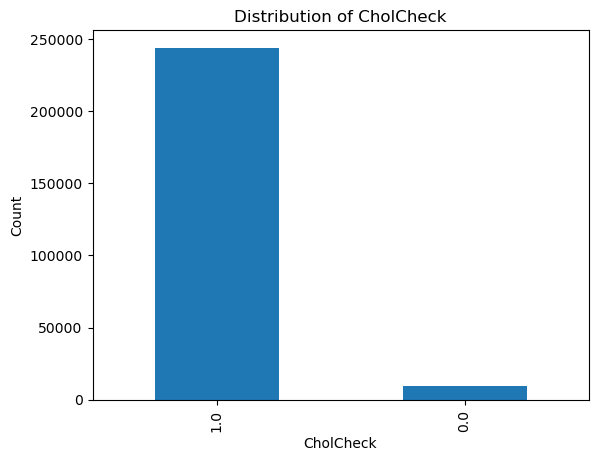

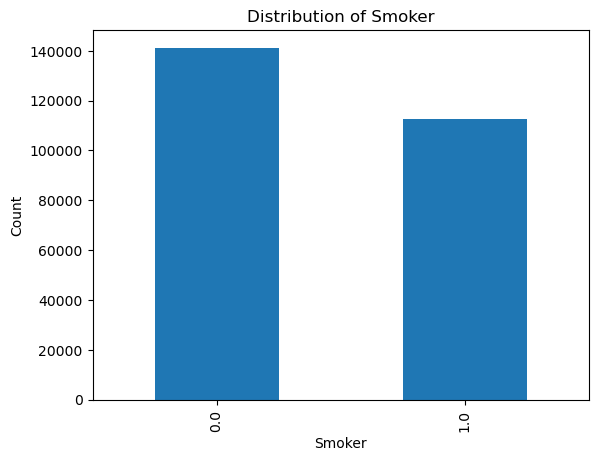

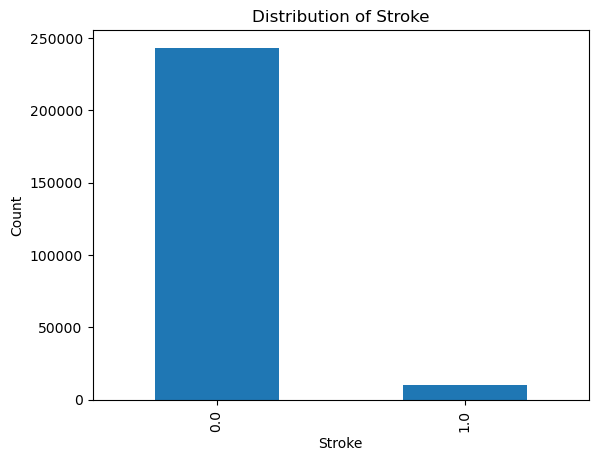

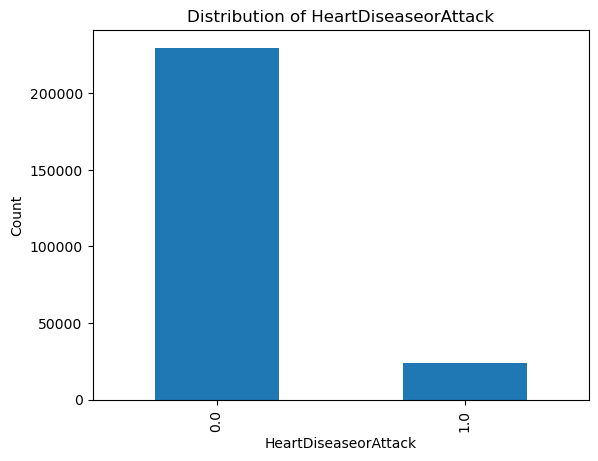

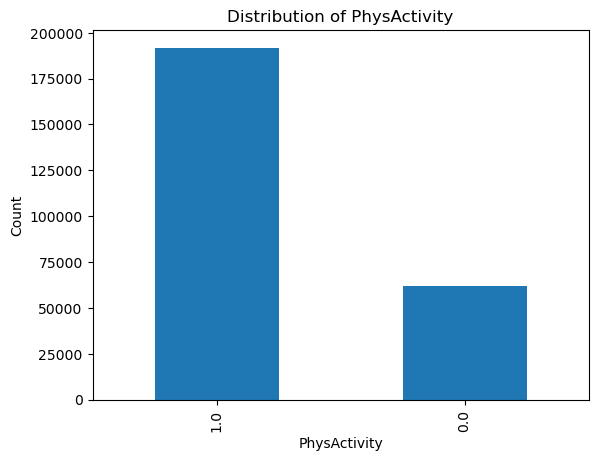

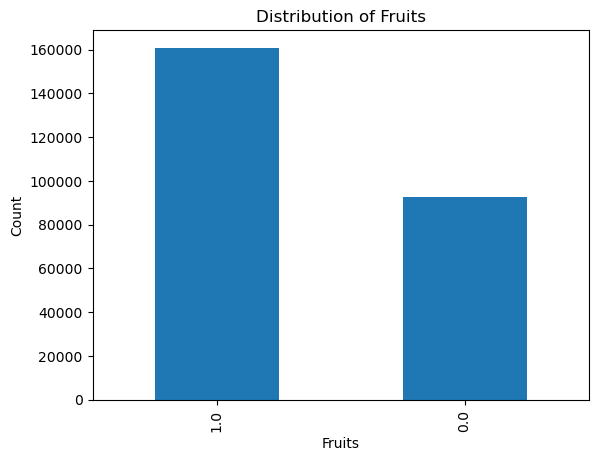

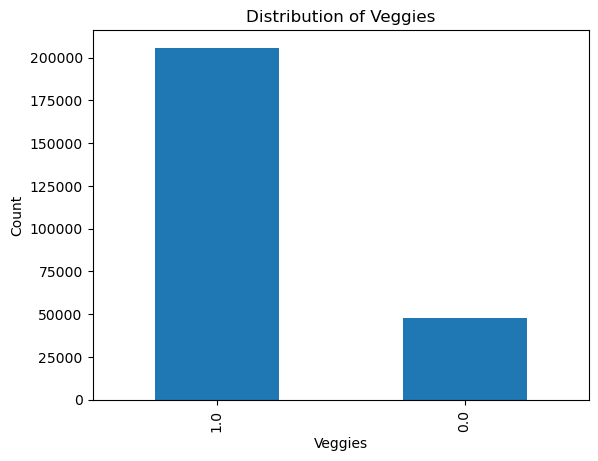

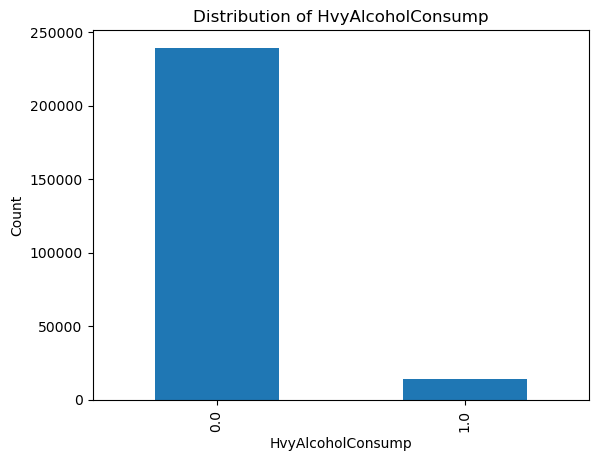

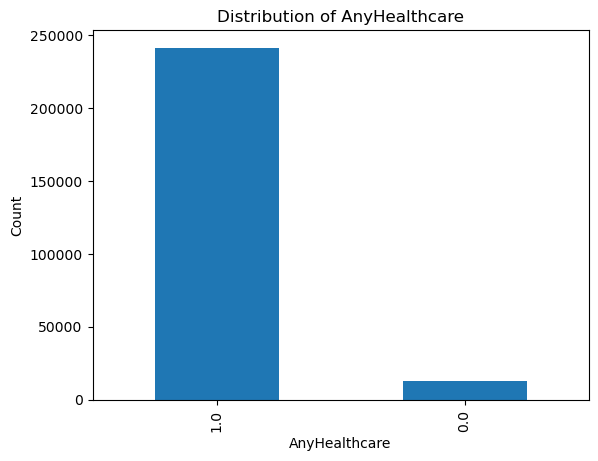

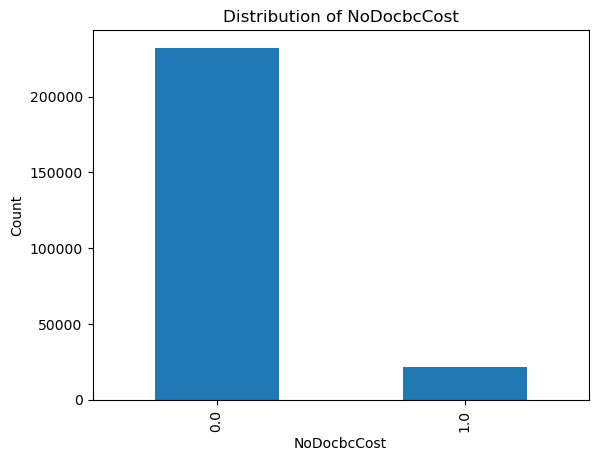

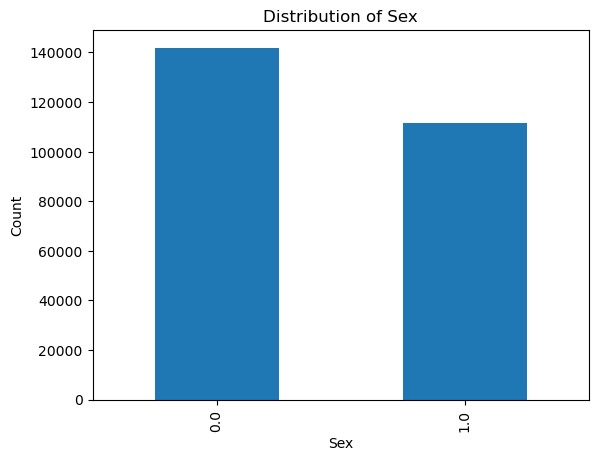

In [4]:
# Identify categorical/binary features to visualize their distributions.

categorical_features = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'Sex'
]

for col in categorical_features:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

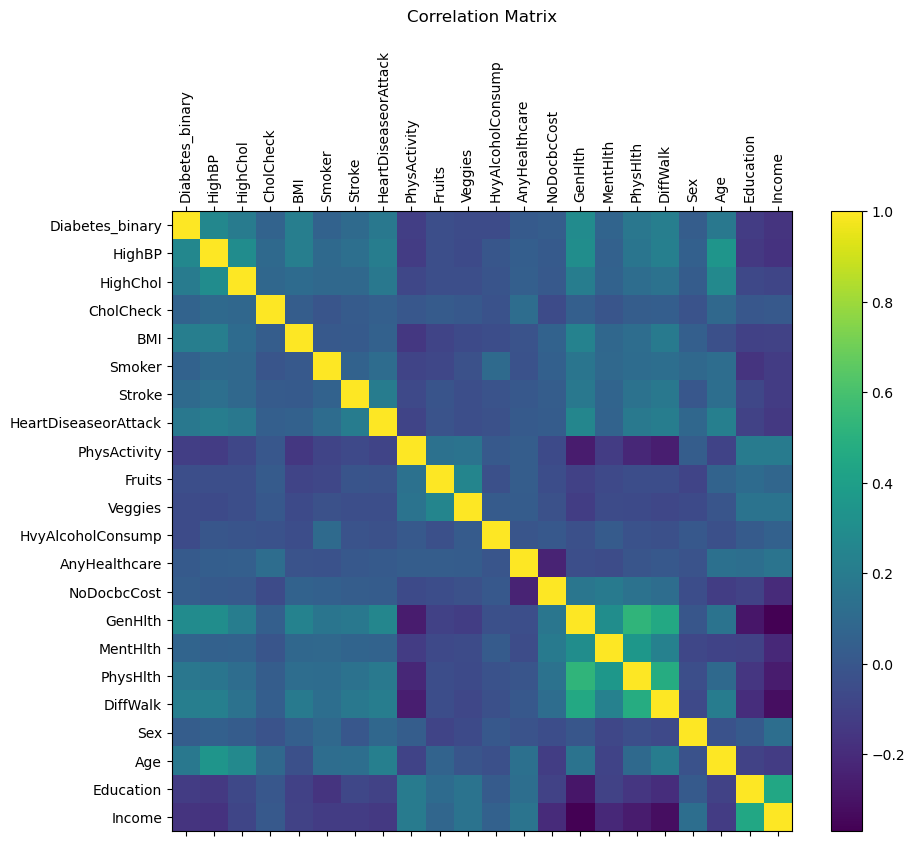

In [5]:
# Mulitvariate analysis

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.title("Correlation Matrix", pad=20)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.show()

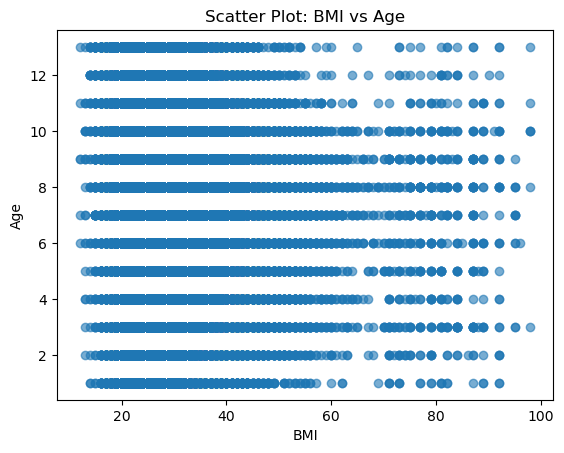

In [6]:
# 2. Scatter Plot: BMI vs Age 
plt.figure()
plt.scatter(df['BMI'], df['Age'], alpha=0.6)
plt.title("Scatter Plot: BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

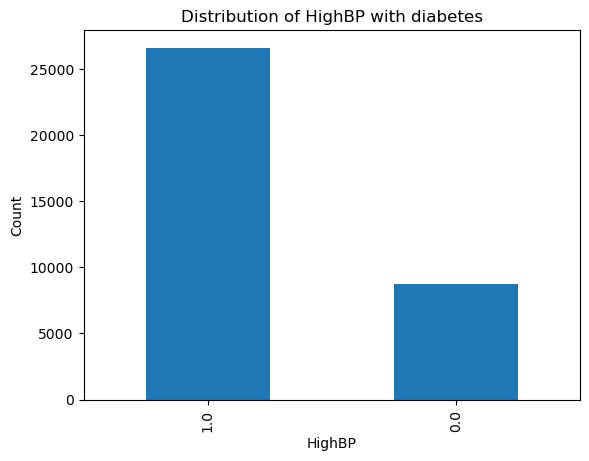

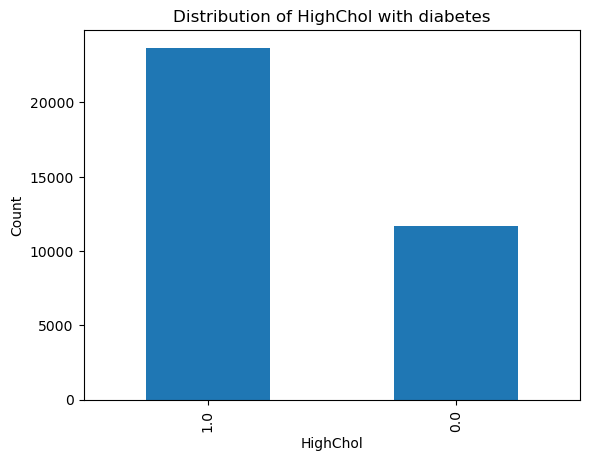

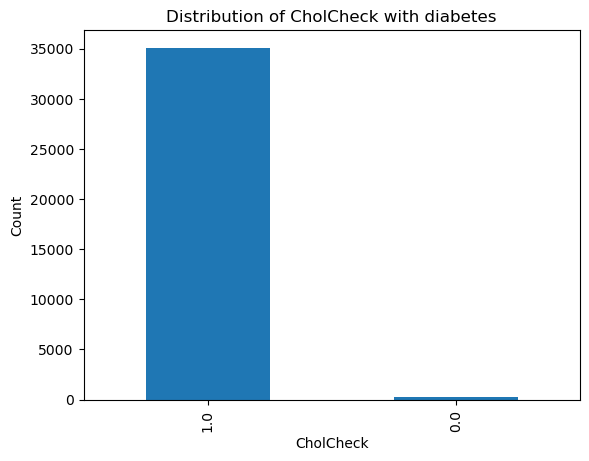

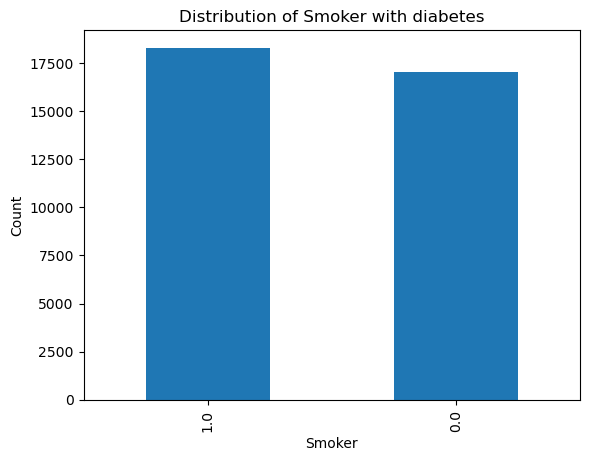

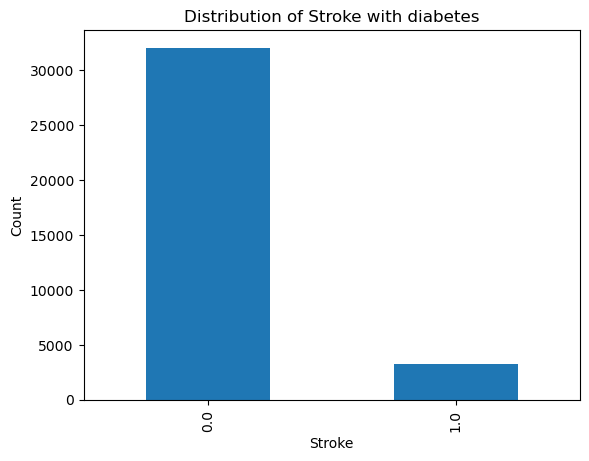

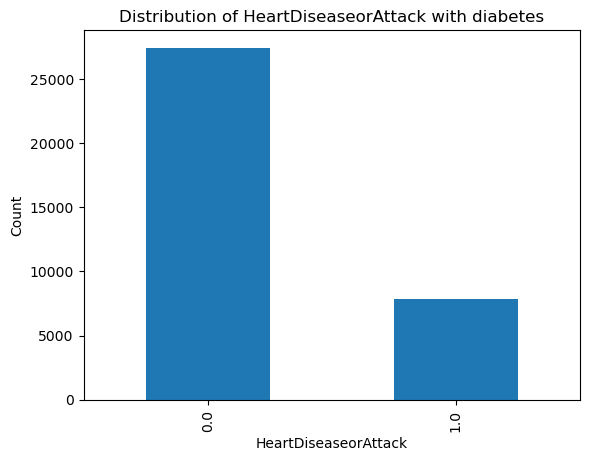

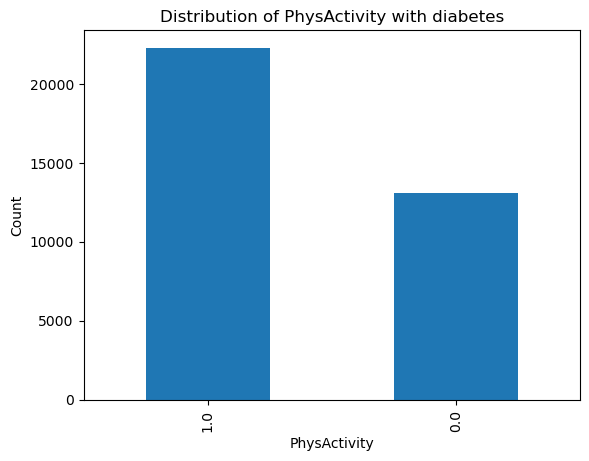

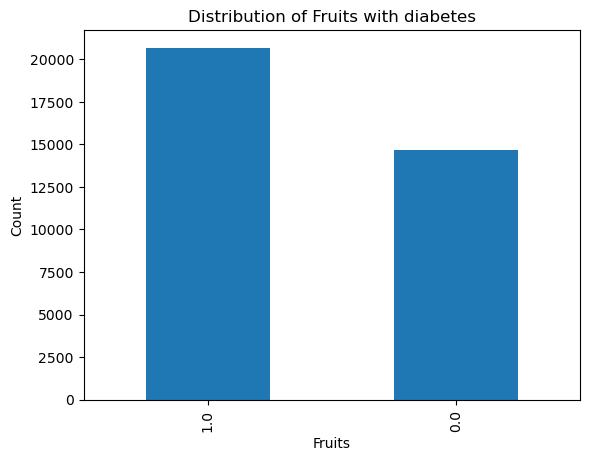

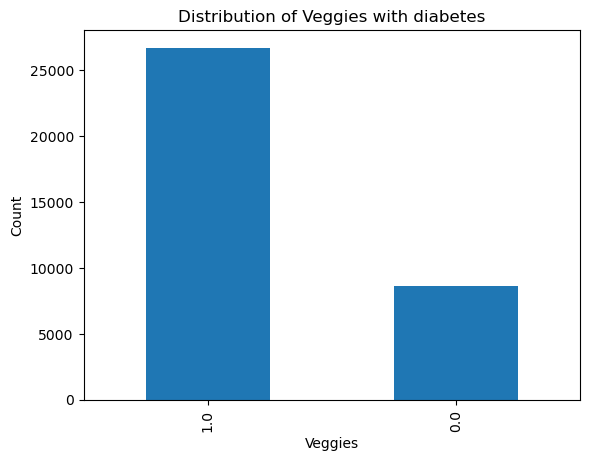

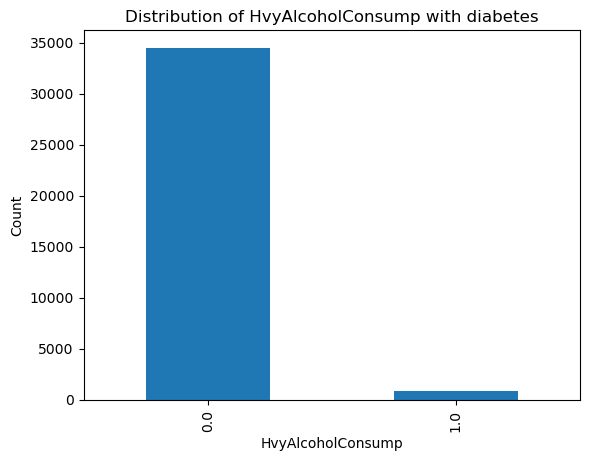

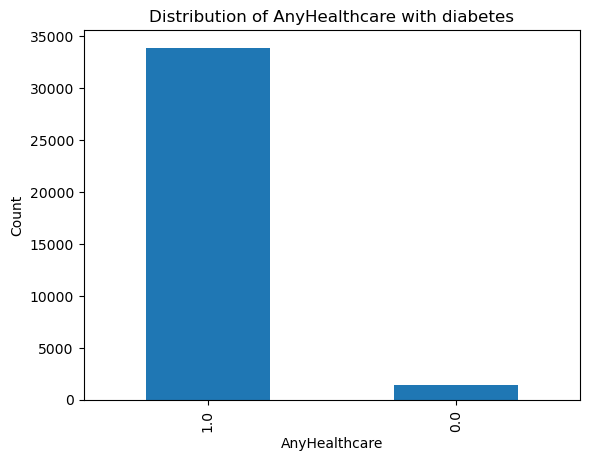

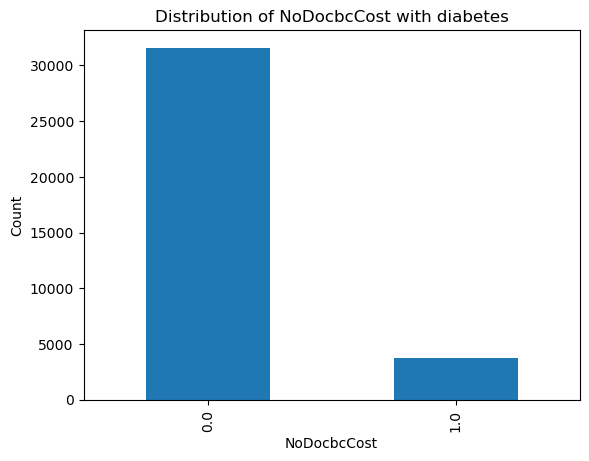

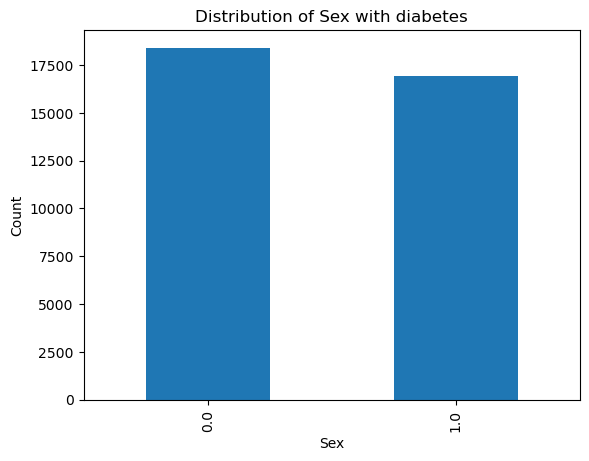

In [7]:
diabetes_df=df[(df['Diabetes_binary']==1)]

for col in categorical_features:
    if(col!='Diabetes_binary'):
        plt.figure()
        diabetes_df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col} with diabetes")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

Explore Data

In [8]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)


Dataset shape: (253680, 22)

Data types:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [9]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000

In [10]:
# Count missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [11]:
# Check for duplicate records
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 24206


Clean Data

In [12]:
print("Dataset shape:", df.shape)
df = df.drop_duplicates()
print("New shape:", df.shape)

Dataset shape: (253680, 22)
New shape: (229474, 22)


Split Data

In [13]:
#Transform target
le = LabelEncoder()
y = le.fit_transform(y)

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

#Scale Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Reassign col names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


Train Models


--- Training and Evaluating Decision Tree ---
Decision Tree Performance:
Accuracy:  0.7951
Precision: 0.8062
Recall:    0.7951
F1 Score:  0.8004
Confusion Matrix:
[[152097  22679]
 [ 18914   9254]]


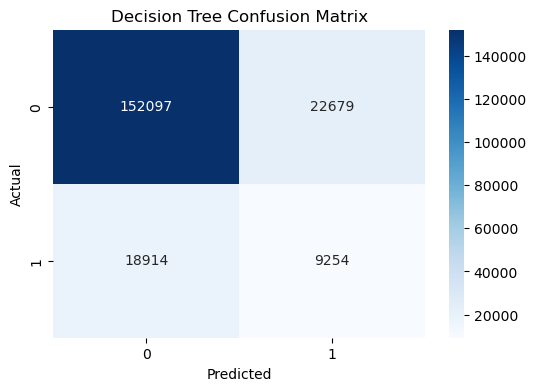


--- Training and Evaluating Logistic Regression ---
Logistic Regression Performance:
Accuracy:  0.8642
Precision: 0.8308
Recall:    0.8642
F1 Score:  0.8308
Confusion Matrix:
[[170941   3835]
 [ 23721   4447]]


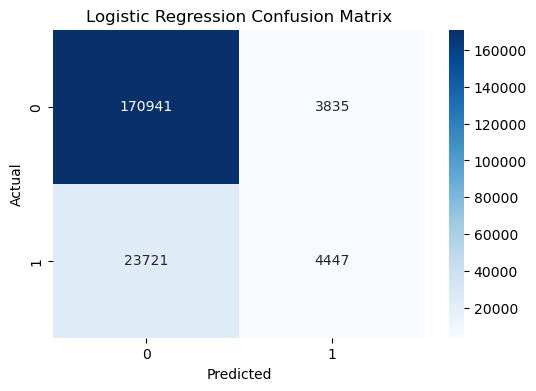


--- Training and Evaluating K Nearest Neighbors ---
K Nearest Neighbors Performance:
Accuracy:  0.8441
Precision: 0.8088
Recall:    0.8441
F1 Score:  0.8208
Confusion Matrix:
[[166089   8687]
 [ 22945   5223]]


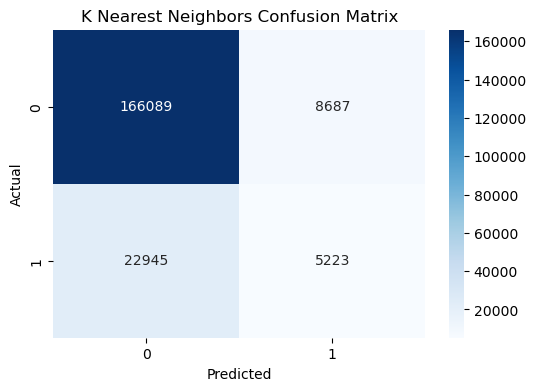


--- Training and Evaluating SVC ---


In [ ]:


total_metrics = {}

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    model.train(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    
    metrics = helpers.evaluate.evaluate_model(y_test, predictions, name)
    total_metrics[name] = metrics


Report Stats

In [ ]:
# Get best metrics
bestModel = ""
bestPerformance = 0.0
for name, metrics in total_metrics.items():
    if metrics["Accuracy"] > bestPerformance:
        bestModel = name
        bestPerformance = metrics["Accuracy"]

print("Best Model =", bestModel)
print("Model Accuracy =", bestPerformance)


Hyperparameter Tuning

In [ ]:
#ignoring warnings when tuning hyperparams
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
for name, model in models.items():
    print(f"\n--- Tuning Hyperparameters for {name} ---")
    model.reset(name)
    model.tune_params(X_train_scaled, y_train, 10, name)

[I 2025-04-23 05:22:06,236] A new study created in RDB with name: Decision Tree



--- Tuning Hyperparameters for Decision Tree ---


[I 2025-04-23 05:22:06,512] Trial 0 finished with value: 0.7198327253514678 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 39, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': None}. Best is trial 0 with value: 0.7198327253514678.
[I 2025-04-23 05:22:06,797] Trial 1 finished with value: 0.6718774406623542 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.7198327253514678.
[I 2025-04-23 05:22:07,044] Trial 2 finished with value: 0.708161975174727 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 0 with value: 0.7198327253514678.
[I 2025-04-23 05:22:07,177] Trial 3 finished with value: 0.7166492886086829 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 42, 'min_samples_split': 19, 'min_sa


--- Tuning Hyperparameters for Logistic Regression ---


[I 2025-04-23 05:22:08,450] Trial 0 pruned. 
[I 2025-04-23 05:22:08,521] Trial 1 pruned. 
[I 2025-04-23 05:22:08,587] Trial 2 pruned. 


Skipping due to error
Skipping due to error
Skipping due to error


[I 2025-04-23 05:22:08,658] Trial 3 pruned. 
[I 2025-04-23 05:22:08,727] Trial 4 pruned. 


Skipping due to error
Skipping due to error


[I 2025-04-23 05:22:09,285] Trial 5 finished with value: 0.7445885027635615 and parameters: {'penalty': None, 'dual': False, 'solver': 'sag', 'multi_class': 'ovr', 'max_iter': 47}. Best is trial 5 with value: 0.7445885027635615.
[I 2025-04-23 05:22:09,364] Trial 6 pruned. 
[I 2025-04-23 05:22:09,426] Trial 7 pruned. 
[I 2025-04-23 05:22:09,491] Trial 8 pruned. 
[I 2025-04-23 05:22:09,559] Trial 9 pruned. 


Skipping due to error
Skipping due to error
Skipping due to error
Skipping due to error


[I 2025-04-23 05:22:09,649] A new study created in RDB with name: K Nearest Neighbors



--- Tuning Hyperparameters for K Nearest Neighbors ---


[I 2025-04-23 05:22:35,191] Trial 0 finished with value: 0.718842126013602 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 23, 'p': 5}. Best is trial 0 with value: 0.718842126013602.
[I 2025-04-23 05:22:36,554] Trial 1 finished with value: 0.7223791195128406 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 11, 'p': 1}. Best is trial 1 with value: 0.7223791195128406.
[I 2025-04-23 05:23:29,680] Trial 2 finished with value: 0.7206813316128723 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 57, 'p': 4}. Best is trial 1 with value: 0.7223791195128406.
[I 2025-04-23 05:23:32,514] Trial 3 finished with value: 0.7037771259060314 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 51, 'p': 1}. Best is trial 1 with value: 0.7223791195128406.
[I 2025-04-23 05:23:34,071] Trial 4 finished with value: 0.7275421538818


--- Tuning Hyperparameters for SVC ---


[I 2025-04-23 05:25:36,116] Trial 0 finished with value: 0.740839795485941 and parameters: {'kernel': 'sigmoid', 'degree': 18, 'gamma': 'auto', 'probability': False}. Best is trial 0 with value: 0.740839795485941.
[I 2025-04-23 05:26:02,586] Trial 1 finished with value: 0.7439523857888846 and parameters: {'kernel': 'rbf', 'degree': 15, 'gamma': 'auto', 'probability': False}. Best is trial 1 with value: 0.7439523857888846.
[I 2025-04-23 05:26:19,621] Trial 2 finished with value: 0.746639772370789 and parameters: {'kernel': 'linear', 'degree': 8, 'gamma': 'auto', 'probability': False}. Best is trial 2 with value: 0.746639772370789.
[I 2025-04-23 05:26:36,595] Trial 3 finished with value: 0.746639772370789 and parameters: {'kernel': 'linear', 'degree': 10, 'gamma': 'auto', 'probability': False}. Best is trial 2 with value: 0.746639772370789.
[I 2025-04-23 05:26:53,545] Trial 4 finished with value: 0.746639772370789 and parameters: {'kernel': 'linear', 'degree': 10, 'gamma': 'auto', 'proba

Skipping due to error


[I 2025-04-23 05:28:51,473] Trial 6 finished with value: 0.7422542976921372 and parameters: {'kernel': 'rbf', 'degree': 17, 'gamma': 'scale', 'probability': True}. Best is trial 2 with value: 0.746639772370789.
